In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.cuda.empty_cache()

In [2]:
df = pd.read_csv('data/TBP_dataset.csv')

In [3]:
df

,r1_x,r1_y,r1_z,r2_x,r2_y,r2_z,r3_x,r3_y,r3_z,v1_x,...,v3_z,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,a3_x,a3_y,a3_z
0,1.472715,0.458162,-1.783420,-0.246754,0.304160,1.443783,-1.526091,0.599368,1.309417,-0.138412,...,0.007316,-0.014544,-0.000278,0.020936,-0.104642,0.026348,-0.024878,0.119186,-0.026070,0.003941
1,1.471713,0.458159,-1.783548,-0.245592,0.304225,1.444994,-1.525682,0.600784,1.309470,-0.138426,...,0.007320,-0.014535,-0.000274,0.020945,-0.104426,0.026398,-0.024952,0.118961,-0.026124,0.004007
2,1.470710,0.458156,-1.783676,-0.244432,0.304290,1.446205,-1.525272,0.602198,1.309523,-0.138441,...,0.007324,-0.014526,-0.000270,0.020953,-0.104210,0.026448,-0.025025,0.118736,-0.026178,0.004072
3,1.469708,0.458153,-1.783804,-0.243272,0.304355,1.447415,-1.524862,0.603613,1.309576,-0.138455,...,0.007328,-0.014517,-0.000266,0.020962,-0.103995,0.026497,-0.025098,0.118511,-0.026231,0.004137
4,1.468706,0.458149,-1.783932,-0.242113,0.304420,1.448625,-1.524450,0.605028,1.309629,-0.138470,...,0.007332,-0.014508,-0.000262,0.020970,-0.103780,0.026546,-0.025171,0.118287,-0.026285,0.004201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.671892,0.837158,-1.447284,1.529639,-0.157186,-3.214849,0.834223,0.860264,-1.484105,-0.092193,...,-0.188842,0.104752,-0.006135,-0.015327,-0.030997,0.028697,0.049410,-0.073754,-0.022561,-0.034083
999996,-0.672559,0.836607,-1.447006,1.529738,-0.157412,-3.215630,0.833738,0.861488,-1.485473,-0.092089,...,-0.188876,0.104706,-0.006022,-0.015416,-0.030989,0.028704,0.049370,-0.073717,-0.022683,-0.033954
999997,-0.673226,0.836057,-1.446729,1.529836,-0.157636,-3.216412,0.833252,0.862711,-1.486840,-0.091984,...,-0.188910,0.104661,-0.005908,-0.015505,-0.030981,0.028712,0.049331,-0.073680,-0.022804,-0.033826
999998,-0.673891,0.835506,-1.446452,1.529933,-0.157861,-3.217193,0.832766,0.863934,-1.488208,-0.091879,...,-0.188943,0.104614,-0.005795,-0.015594,-0.030973,0.028719,0.049291,-0.073642,-0.022925,-0.033698


In [4]:
extra_colm = df.columns
draft_data = df[extra_colm].iloc[1:].reset_index(drop=True)
draft_data

,r1_x,r1_y,r1_z,r2_x,r2_y,r2_z,r3_x,r3_y,r3_z,v1_x,...,v3_z,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,a3_x,a3_y,a3_z
0,1.471713,0.458159,-1.783548,-0.245592,0.304225,1.444994,-1.525682,0.600784,1.309470,-0.138426,...,0.007320,-0.014535,-0.000274,0.020945,-0.104426,0.026398,-0.024952,0.118961,-0.026124,0.004007
1,1.470710,0.458156,-1.783676,-0.244432,0.304290,1.446205,-1.525272,0.602198,1.309523,-0.138441,...,0.007324,-0.014526,-0.000270,0.020953,-0.104210,0.026448,-0.025025,0.118736,-0.026178,0.004072
2,1.469708,0.458153,-1.783804,-0.243272,0.304355,1.447415,-1.524862,0.603613,1.309576,-0.138455,...,0.007328,-0.014517,-0.000266,0.020962,-0.103995,0.026497,-0.025098,0.118511,-0.026231,0.004137
3,1.468706,0.458149,-1.783932,-0.242113,0.304420,1.448625,-1.524450,0.605028,1.309629,-0.138470,...,0.007332,-0.014508,-0.000262,0.020970,-0.103780,0.026546,-0.025171,0.118287,-0.026285,0.004201
4,1.467703,0.458146,-1.784060,-0.240954,0.304485,1.449836,-1.524038,0.606442,1.309682,-0.138484,...,0.007336,-0.014498,-0.000258,0.020979,-0.103565,0.026595,-0.025244,0.118064,-0.026337,0.004265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-0.671892,0.837158,-1.447284,1.529639,-0.157186,-3.214849,0.834223,0.860264,-1.484105,-0.092193,...,-0.188842,0.104752,-0.006135,-0.015327,-0.030997,0.028697,0.049410,-0.073754,-0.022561,-0.034083
999995,-0.672559,0.836607,-1.447006,1.529738,-0.157412,-3.215630,0.833738,0.861488,-1.485473,-0.092089,...,-0.188876,0.104706,-0.006022,-0.015416,-0.030989,0.028704,0.049370,-0.073717,-0.022683,-0.033954
999996,-0.673226,0.836057,-1.446729,1.529836,-0.157636,-3.216412,0.833252,0.862711,-1.486840,-0.091984,...,-0.188910,0.104661,-0.005908,-0.015505,-0.030981,0.028712,0.049331,-0.073680,-0.022804,-0.033826
999997,-0.673891,0.835506,-1.446452,1.529933,-0.157861,-3.217193,0.832766,0.863934,-1.488208,-0.091879,...,-0.188943,0.104614,-0.005795,-0.015594,-0.030973,0.028719,0.049291,-0.073642,-0.022925,-0.033698


In [5]:
df = df.iloc[:-1].reset_index(drop=True) 

In [6]:
df

,r1_x,r1_y,r1_z,r2_x,r2_y,r2_z,r3_x,r3_y,r3_z,v1_x,...,v3_z,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,a3_x,a3_y,a3_z
0,1.472715,0.458162,-1.783420,-0.246754,0.304160,1.443783,-1.526091,0.599368,1.309417,-0.138412,...,0.007316,-0.014544,-0.000278,0.020936,-0.104642,0.026348,-0.024878,0.119186,-0.026070,0.003941
1,1.471713,0.458159,-1.783548,-0.245592,0.304225,1.444994,-1.525682,0.600784,1.309470,-0.138426,...,0.007320,-0.014535,-0.000274,0.020945,-0.104426,0.026398,-0.024952,0.118961,-0.026124,0.004007
2,1.470710,0.458156,-1.783676,-0.244432,0.304290,1.446205,-1.525272,0.602198,1.309523,-0.138441,...,0.007324,-0.014526,-0.000270,0.020953,-0.104210,0.026448,-0.025025,0.118736,-0.026178,0.004072
3,1.469708,0.458153,-1.783804,-0.243272,0.304355,1.447415,-1.524862,0.603613,1.309576,-0.138455,...,0.007328,-0.014517,-0.000266,0.020962,-0.103995,0.026497,-0.025098,0.118511,-0.026231,0.004137
4,1.468706,0.458149,-1.783932,-0.242113,0.304420,1.448625,-1.524450,0.605028,1.309629,-0.138470,...,0.007332,-0.014508,-0.000262,0.020970,-0.103780,0.026546,-0.025171,0.118287,-0.026285,0.004201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-0.671224,0.837708,-1.447561,1.529541,-0.156961,-3.214066,0.834708,0.859041,-1.482739,-0.092298,...,-0.188808,0.104796,-0.006249,-0.015238,-0.031006,0.028689,0.049449,-0.073791,-0.022440,-0.034211
999995,-0.671892,0.837158,-1.447284,1.529639,-0.157186,-3.214849,0.834223,0.860264,-1.484105,-0.092193,...,-0.188842,0.104752,-0.006135,-0.015327,-0.030997,0.028697,0.049410,-0.073754,-0.022561,-0.034083
999996,-0.672559,0.836607,-1.447006,1.529738,-0.157412,-3.215630,0.833738,0.861488,-1.485473,-0.092089,...,-0.188876,0.104706,-0.006022,-0.015416,-0.030989,0.028704,0.049370,-0.073717,-0.022683,-0.033954
999997,-0.673226,0.836057,-1.446729,1.529836,-0.157636,-3.216412,0.833252,0.862711,-1.486840,-0.091984,...,-0.188910,0.104661,-0.005908,-0.015505,-0.030981,0.028712,0.049331,-0.073680,-0.022804,-0.033826


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
Y_normalized = pd.DataFrame(scaler.fit_transform(draft_data), columns=draft_data.columns)


In [8]:
from sklearn.model_selection import train_test_split

# 70 - 15 - 15 split

X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_normalized.values, Y_normalized.values, test_size=0.3, random_state=42
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
Y_val = torch.tensor(Y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

Training set size: 699999
Validation set size: 150000
Test set size: 150000


In [9]:
class MeraModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MeraModel, self).__init__()
        self.pf = nn.Linear(input_size, hidden_size*4)
        self.pf2 = nn.Linear(hidden_size*4, hidden_size*2)
        self.pf3 = nn.Linear(hidden_size*2, hidden_size)
        self.pf4a = nn.Linear(hidden_size, hidden_size)
        self.pf4b = nn.Linear(hidden_size, hidden_size)
        self.pf4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.pf(x))
        x = F.relu(self.pf2(x))
        x = F.relu(self.pf3(x))
        x_a = F.relu(self.pf4a(x))
        x_b = F.relu(self.pf4b(x))
        x = x_a + x_b
        x = self.pf4(x)
        return x

In [10]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)


batch_size = 4096 # Check for a good value that results in more vram usage and better accuracy
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training batches: {len(train_dataloader)}")
print(f"Number of validation batches: {len(val_dataloader)}")
print(f"Number of test batches: {len(test_dataloader)}")

Using device: cuda
Number of training batches: 171
Number of validation batches: 37
Number of test batches: 37


In [11]:
def evaluate_model(model, dataloader, criterion, device):
    """Evaluate model on a given dataset"""
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in dataloader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            output = model(batch_x)
            loss = criterion(output, batch_y)
            total_loss += loss.item()
    
    avg_loss = total_loss / len(dataloader)
    model.train()
    return avg_loss

input_size = X_train.shape[1]
hidden_size = 64
output_size = input_size

model = MeraModel(input_size, hidden_size, output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 50
train_losses = []
val_losses = []

print("Starting training...")
for epoch in range(epochs):

    model.train()
    total_train_loss = 0
    for batch_x, batch_y in train_dataloader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = model(batch_x)
        loss = criterion(output, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    avg_val_loss = evaluate_model(model, val_dataloader, criterion, device)
    val_losses.append(avg_val_loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"  Training Loss: {avg_train_loss:.4f}")
        print(f"  Validation Loss: {avg_val_loss:.4f}")

print("Training completed!")

Starting training...
Epoch [1/50]
  Training Loss: 0.5838
  Validation Loss: 0.2541
Epoch [10/50]
  Training Loss: 0.1905
  Validation Loss: 0.1438
Epoch [20/50]
  Training Loss: 0.1382
  Validation Loss: 0.1240
Epoch [30/50]
  Training Loss: 0.0804
  Validation Loss: 0.0741
Epoch [40/50]
  Training Loss: 0.0821
  Validation Loss: 0.0540
Epoch [50/50]
  Training Loss: 0.0598
  Validation Loss: 0.0616
Training completed!


In [12]:
torch.save(model.state_dict(), 'mera_model_new_new.pth')

In [13]:
print("FINAL EVALUATION RESULTS")

final_train_loss = evaluate_model(model, train_dataloader, criterion, device)
final_val_loss = evaluate_model(model, val_dataloader, criterion, device)
final_test_loss = evaluate_model(model, test_dataloader, criterion, device)

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")

print(f"\nRelative to Training Loss:")
print(f"Validation Loss Ratio: {final_val_loss/final_train_loss:.3f}")
print(f"Test Loss Ratio: {final_test_loss/final_train_loss:.3f}")

if final_val_loss > final_train_loss * 1.5:
    print("\nPotential overfitting detected")
elif final_val_loss < final_train_loss * 1.1:
    print("\nGood generalization")
else:
    print("\nModerate generalization gap")

FINAL EVALUATION RESULTS
Final Training Loss: 0.0432
Final Validation Loss: 0.0616
Final Test Loss: 0.1524

Relative to Training Loss:
Validation Loss Ratio: 1.425
Test Loss Ratio: 3.526

Moderate generalization gap


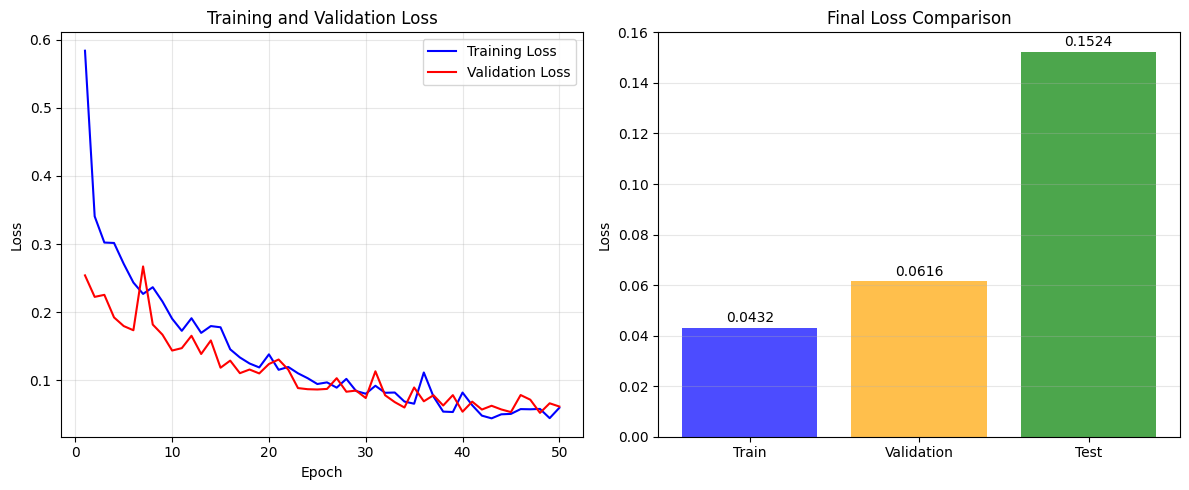

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Training and validation losses in epochs
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Bar chart of final losses
plt.subplot(1, 2, 2)
splits = ['Train', 'Validation', 'Test']
losses = [final_train_loss, final_val_loss, final_test_loss]
colors = ['blue', 'orange', 'green']

bars = plt.bar(splits, losses, color=colors, alpha=0.7)
plt.ylabel('Loss')
plt.title('Final Loss Comparison')
plt.grid(True, alpha=0.3, axis='y')

for bar, loss in zip(bars, losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{loss:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
# Demonstrate predictions on samples from each split
def show_predictions(model, X_data, Y_data, split_name, num_samples=3):

    model.eval()
    with torch.no_grad():

        sample_X = X_data[:num_samples].to(device)
        sample_Y = Y_data[:num_samples].to(device)
        
        predictions = model(sample_X)
        
        print(f"\n{split_name} Split - Sample Predictions:")
        
        for i in range(num_samples):
            actual = sample_Y[i].cpu().numpy()
            pred = predictions[i].cpu().numpy()
            mse = np.mean((actual - pred) ** 2)
            
            print(f"Sample {i+1}:")
            print(f"  MSE: {mse:.6f}")
            print(f"  First 5 actual values: {actual[:5]}")
            print(f"  First 5 predicted values: {pred[:5]}")
            print()

show_predictions(model, X_train, Y_train, "Training")
show_predictions(model, X_val, Y_val, "Validation") 
show_predictions(model, X_test, Y_test, "Test")


Training Split - Sample Predictions:
Sample 1:
  MSE: 0.009193
  First 5 actual values: [-0.65418047 -0.4475063  -0.5335036  -1.3605008   0.27878222]
  First 5 predicted values: [-0.58975077 -0.4232514  -0.4482537  -1.5400794   0.25440633]

Sample 2:
  MSE: 0.014214
  First 5 actual values: [ 1.101079    0.56949264  1.9930897  -0.60396117 -0.06089673]
  First 5 predicted values: [ 1.0594475   0.5236073   2.1130245  -0.85786283  0.09601896]

Sample 3:
  MSE: 0.006849
  First 5 actual values: [ 1.4717438   2.5159416   0.17283903 -1.3233039   0.27253532]
  First 5 predicted values: [ 1.4454362   2.6207902   0.21589755 -1.2566788   0.44579053]


Validation Split - Sample Predictions:
Sample 1:
  MSE: 0.009583
  First 5 actual values: [ 2.0412505  0.1797929  0.6635446 -1.219129   0.4856795]
  First 5 predicted values: [ 2.1376517   0.23108652  0.8577634  -1.35014     0.6845053 ]

Sample 2:
  MSE: 0.005487
  First 5 actual values: [ 0.14763206 -0.73569065  1.2070948   0.716822   -1.1342306 

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    X_test_cpu = X_test.to(device)
    Y_test_cpu = Y_test.to(device)
    Y_pred = model(X_test_cpu).cpu().numpy()
    Y_true = Y_test_cpu.cpu().numpy()

# MSE and R2 scores
mse = mean_squared_error(Y_true, Y_pred)
r2 = r2_score(Y_true, Y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Test MSE: 0.1533
Test R2 Score: 0.8396
